# DL 3 - Question 1 , Question 2
1. In the code provided https://umkc.box.com/s/3so2s3dx7cjp4hwnurjx6t3it161ptey ,there are three mistake which stop the code to get run successfully; find those mistakes and explain why they need to be corrected to be able to get the code run
2. Add embedding layer to the model, did you experience any improvement?

In [1]:
#Importing the libraries
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import Dropout
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Flatten

In [2]:
#Importing the data
df = pd.read_csv('imdb_master.csv',encoding='latin-1')
df.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [3]:
#Reading the data
sentences = df['review'].values
y = df['label'].values

In [4]:
#tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

In [5]:
#getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)

In [6]:
#Encoding the target column
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [7]:
#Building the model
model = Sequential()
model.add(layers.Dense(300,input_dim=input_dim, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

NameError: name 'input_dim' is not defined

## Mistake 1 : input_dim is not defined

In [8]:
#Getting the dimensions of dataframe
dimData = np.prod(X_train.shape[1:])
print(dimData)

2000


#### As we could see dimensions of df is 2000 also we could see this while tokenizing the data (Tokenizer(num_words=2000))

In [9]:
#Building the model
model = Sequential()
model.add(layers.Dense(300,input_shape=(dimData,), activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
293/293 [==============================] - 2s 8ms/step - loss: 0.8627 - acc: 0.5036 - val_loss: 0.8342 - val_acc: 0.5070
Epoch 2/5
293/293 [==============================] - 2s 7ms/step - loss: 0.8198 - acc: 0.5179 - val_loss: 0.8381 - val_acc: 0.5175
Epoch 3/5
293/293 [==============================] - 2s 7ms/step - loss: 0.7857 - acc: 0.5466 - val_loss: 0.8379 - val_acc: 0.5142
Epoch 4/5
293/293 [==============================] - 2s 8ms/step - loss: 0.7094 - acc: 0.6125 - val_loss: 0.8646 - val_acc: 0.5151
Epoch 5/5
293/293 [==============================] - 2s 8ms/step - loss: 0.5356 - acc: 0.7485 - val_loss: 0.9688 - val_acc: 0.5123


## Mistake 2 : Generally, we use softmax activation instead of sigmoid with the cross-entropy loss because softmax activation distributes the probability throughout each output node. 

In [10]:
#Building the model
model = Sequential()
model.add(layers.Dense(300,input_shape=(dimData,), activation='relu'))
#model.add(Dropout(0.2)) to drop some outliers
model.add(layers.Dense(3, activation='softmax')) #Changed activation to softmax since softmax 
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=64)

Epoch 1/5
1172/1172 [==============================] - 5s 4ms/step - loss: 0.8672 - acc: 0.5061 - val_loss: 0.8387 - val_acc: 0.5135
Epoch 2/5
1172/1172 [==============================] - 5s 4ms/step - loss: 0.7886 - acc: 0.5759 - val_loss: 0.8445 - val_acc: 0.5135
Epoch 3/5
1172/1172 [==============================] - 5s 4ms/step - loss: 0.6581 - acc: 0.6895 - val_loss: 0.8981 - val_acc: 0.5128
Epoch 4/5
1172/1172 [==============================] - 5s 4ms/step - loss: 0.3952 - acc: 0.8525 - val_loss: 1.0750 - val_acc: 0.5018
Epoch 5/5
1172/1172 [==============================] - 5s 4ms/step - loss: 0.1717 - acc: 0.9577 - val_loss: 1.3270 - val_acc: 0.5034


## Mistake 3 : As the main moto of predection is positive or negative we will remove 'unsup' value from label column and will pass number of classes as 2 instead of 3

In [11]:
#Dropping the unsup label since the main moto of predection is positive or negative
df = df[df.label != 'unsup']

In [12]:
#getting the vocabulary of data
sentences = df['review'].values
y = df['label'].values

In [13]:
#Encoding the target column
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [14]:
#getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)

In [15]:
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [16]:
#Building the model.
model = Sequential()
model.add(layers.Dense(300,input_shape=(dimData,), activation='relu'))
model.add(layers.Dense(2, activation='softmax')) #Changed number of classed from 3 to 2
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
147/147 [==============================] - 1s 9ms/step - loss: 0.3443 - acc: 0.8537 - val_loss: 0.2988 - val_acc: 0.8762
Epoch 2/5
147/147 [==============================] - 1s 8ms/step - loss: 0.2557 - acc: 0.8952 - val_loss: 0.2964 - val_acc: 0.8775
Epoch 3/5
147/147 [==============================] - 1s 8ms/step - loss: 0.2062 - acc: 0.9203 - val_loss: 0.2946 - val_acc: 0.8754
Epoch 4/5
147/147 [==============================] - 1s 8ms/step - loss: 0.1372 - acc: 0.9530 - val_loss: 0.3120 - val_acc: 0.8758
Epoch 5/5
147/147 [==============================] - 1s 8ms/step - loss: 0.0722 - acc: 0.9840 - val_loss: 0.3308 - val_acc: 0.8742


In [17]:
#Printing the summary and accuarcy of the model
print(model.summary())
print(model.evaluate(X_test, y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 300)               600300    
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 602       
Total params: 600,902
Trainable params: 600,902
Non-trainable params: 0
_________________________________________________________________
None
391/391 [==============================] - 0s 1ms/step - loss: 0.3308 - acc: 0.8742
[0.3307819664478302, 0.874239981174469]


In [18]:
#Listing all the data in history (Call Backs)
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

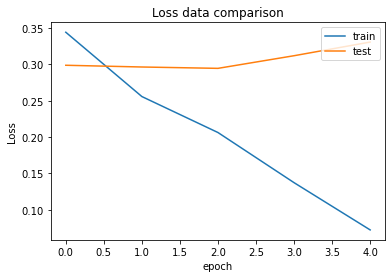

In [19]:
# Plotting the loss for both training data and validation data using the history object.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss data comparison')
plt.legend(['train', 'test'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

#### Observations :
1. Loss of the model is around 33%

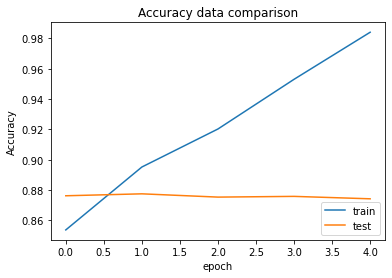

In [20]:
# Plotting the Accuracy for both training data and validation data using the history object.
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('Accuracy data comparison')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

#### Observations :
1. Accuracy of the model is around 88%

## Mistakes:
1. input_dim is not defined.
2. Generally, we use softmax activation instead of sigmoid with the cross-entropy loss over multi class classification because softmax activation distributes the probability throughout each output node.
3. As the main moto of predection is positive or negative we will remove 'unsup' value from label column and will pass number of classes as 2 instead of 3

# 2. Embedding the layers

In [21]:
sentences = df['review'].values

In [22]:
#Embedding the layers
max_review_len = max([len(s.split()) for s in sentences])
vocab_size = len(tokenizer.word_index)+1

#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

#getting the vocabulary of data
X_train_voc = tokenizer.texts_to_sequences(X_train)
X_test_voc = tokenizer.texts_to_sequences(X_test)

padded_train = pad_sequences(X_train_voc,maxlen=max_review_len)
paded_test = pad_sequences(X_test_voc,maxlen=max_review_len)

In [30]:
#Building the model.
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=max_review_len))
model.add(Flatten())
model.add(layers.Dense(300,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(padded_train,y_train, epochs=5, verbose=True, validation_data=(paded_test,y_test), batch_size=256)

Epoch 1/5
147/147 [==============================] - 77s 526ms/step - loss: 0.5428 - acc: 0.7461 - val_loss: 0.2991 - val_acc: 0.8752
Epoch 2/5
147/147 [==============================] - 81s 553ms/step - loss: 0.2514 - acc: 0.8974 - val_loss: 0.2877 - val_acc: 0.8784
Epoch 3/5
147/147 [==============================] - 80s 547ms/step - loss: 0.1783 - acc: 0.9346 - val_loss: 0.3021 - val_acc: 0.8783
Epoch 4/5
147/147 [==============================] - 80s 541ms/step - loss: 0.1056 - acc: 0.9699 - val_loss: 0.3429 - val_acc: 0.8721
Epoch 5/5
147/147 [==============================] - 78s 532ms/step - loss: 0.0492 - acc: 0.9917 - val_loss: 0.3876 - val_acc: 0.8698


In [24]:
#Printing the summary and accuarcy of the model
print(model.summary())
print(model.evaluate(paded_test, y_test))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2470, 50)          8820400   
_________________________________________________________________
flatten (Flatten)            (None, 123500)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               37050300  
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 301       
Total params: 45,871,001
Trainable params: 45,871,001
Non-trainable params: 0
_________________________________________________________________
None
391/391 [==============================] - 14s 35ms/step - loss: 0.3833 - acc: 0.8667
[0.38327059149742126, 0.8667200207710266]


In [25]:
#Listing all the data in history (Call Backs)
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

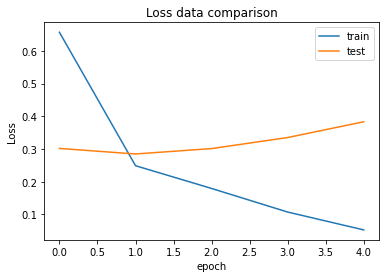

In [26]:
# Plotting the loss for both training data and validation data using the history object.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss data comparison')
plt.legend(['train', 'test'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

#### Observations :
1. Loss of the model is around 38%

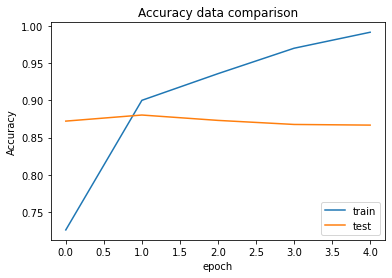

In [27]:
# Plotting the Accuracy for both training data and validation data using the history object.
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('Accuracy data comparison')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

#### Observations :
1. Accuracy of the model is around 87%

## After adding the embedding layers, loss was increased and accuracy was reduced.